In [1]:
import sys
import pandas as pd
import numpy as np
import math
from scipy.special import softmax
from scipy.optimize import minimize, LinearConstraint
from scipy.spatial.distance import braycurtis
import multiprocessing
from concurrent.futures import ProcessPoolExecutor, as_completed
from imports import *
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
# # adding Folder_2 to the system path
# sys.path.insert(0, r'C:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\code')
# # sys.path.insert(0, r'C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\code')

from imports import  *

import social_model_class
reload(social_model_class)


<module 'social_model_class' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\social_model_class.py'>

In [2]:
data_path = r"train_data.csv"
metadata_path = r"train_metadata.csv"

$$\Delta_t  \space windowing$$

In [3]:
model = social_model_class.superModel(data_path, metadata_path)

## cross validation (4 - fold)

In [4]:
np.random.seed(0)
baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]

data_df = pd.read_csv(data_path, index_col=0)
metadata_df = pd.read_csv(metadata_path, index_col=0)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    

In [5]:
np.random.seed(1)
baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]

data_df = pd.read_csv(data_path, index_col=0)
metadata_df = pd.read_csv(metadata_path, index_col=0)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    
for i in range(4):
    model = social_model_class.superModel(fr".\cross_val_data\train_data_{i}.csv", fr".\cross_val_data\train_metadata_{i}.csv")
    model.alpha_ = np.array([0]*61)
    
    cpus = max(1, min(multiprocessing.cpu_count() - 2, len(model.baboons)))
    with ProcessPoolExecutor(cpus) as executor:
        futures = [executor.submit(baboon.fit, model.alpha_) for baboon in model.baboons.values()]
        for future in as_completed(futures):
            pass
    
    print(f"predicting {i}")
    
    model.add_new_data(fr".\cross_val_data\known_data_{i}.csv", fr".\cross_val_data\known_metadata_{i}.csv")

    print(f"new data added {i}")
    predictions_noniterative = model.predict(groups[i].keys(), iterative=False)
    predictions_iterative = model.predict(groups[i].keys(), iterative=True)
    predictions_noniterative.to_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv")
    predictions_iterative.to_csv(fr".\cross_val_data\predictions_iterative_{i}.csv")

predicting 0
20
6009
4787
new data added 0


c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])
c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])


predicting 1
20
6009
4597
new data added 1


c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])
c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])


predicting 2
20
6010
4725
new data added 2


c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])
c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])


predicting 3
20
6046
4669
new data added 3


c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])
c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat([predictions, fut.result()])


1222 1222 1222 1222
Index([], dtype='object', name='sample')
Index([], dtype='object')
1412 1412 1412 1411
Index(['sample_11413-TTATACGTTGTA-397'], dtype='object', name='sample')
Index(['sample_11407-CACGAGCTACTC-394'], dtype='object')
1285 1285 1285 1285
Index([], dtype='object', name='sample')
Index([], dtype='object')
1377 1377 1377 1374
Index(['sample_12051-ACTGGCAAACCT-408', 'sample_11413-TAGTTACTAGTT-397',
       'sample_11407-CGTAGTACCACA-394'],
      dtype='object', name='sample')
Index(['sample_11407-TACTAGATATTA-394', 'sample_11410-AGTTGTAGTCCG-396',
       'sample_12049-GACTTATGCCCG-407'],
      dtype='object')


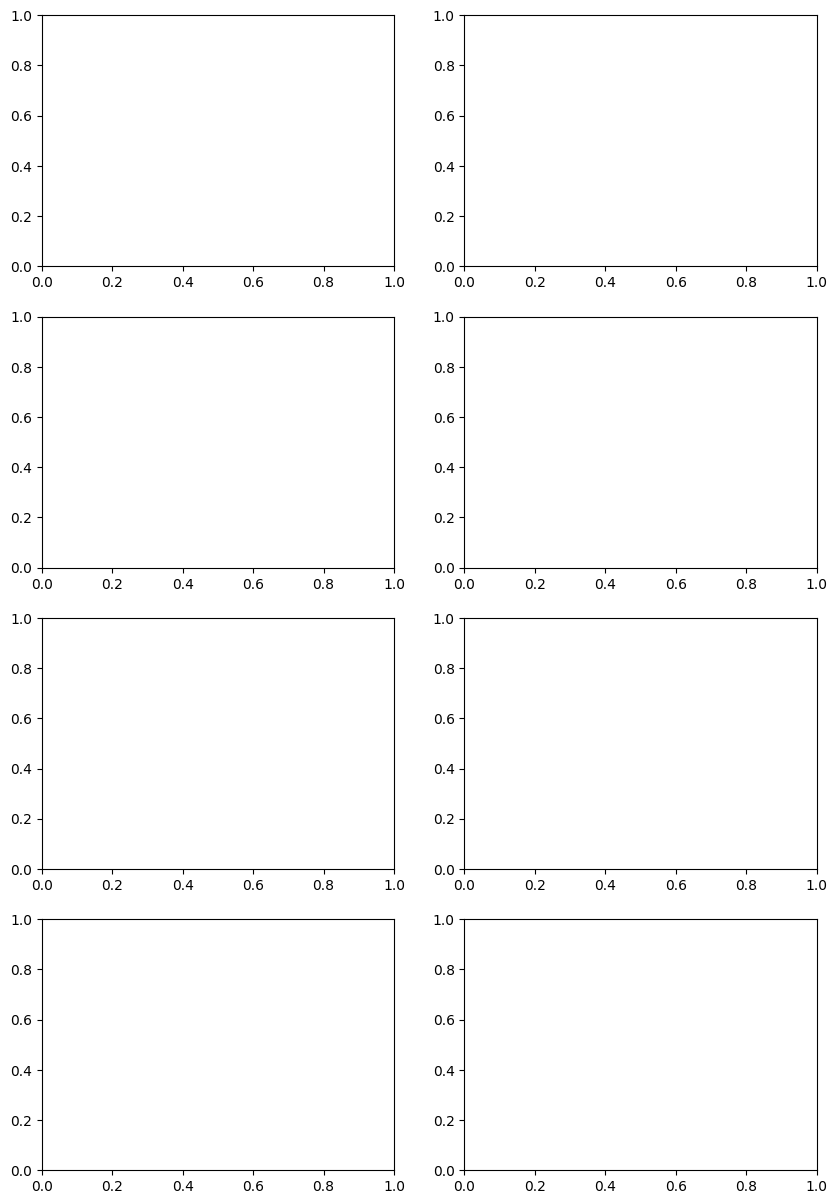

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
for i in range(4):
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

#     for baboon in groups[i].keys():
#         bc_noniterative = []
#         bc_iterative = []
#         for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
#             score_iter = 0
#             score_noniter = 0
#             score_iter += braycurtis(true_data.loc[idx], predictions_iterative.loc[idx])/len(true_data)
#             score_noniter += braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx])/len(true_data)
        

#         bc_noniterative.append(score_noniter)
#         bc_iterative.append(score_iter)
#     sns.kdeplot(bc_noniterative, ax=axes[i, 0], label="noniterative", axes=axes[i, 0])
#     sns.kdeplot(bc_iterative, ax=axes[i, 1], label="iterative", axes=axes[i, 0])

# axes[0,0].set_title("non-iterative")
# axes[0,1].set_title("iterative")
# plt.show()
    print(len(predictions_noniterative), len(predictions_iterative), len(true_data), len(np.intersect1d(true_data.index, predictions_iterative.index)))
    print(true_data.index[~true_data.index.isin(predictions_iterative.index)])
    print(predictions_noniterative.index[~predictions_noniterative.index.isin(true_data.index)]) 
    

SyntaxError: keyword argument repeated: label (3062073230.py, line 19)

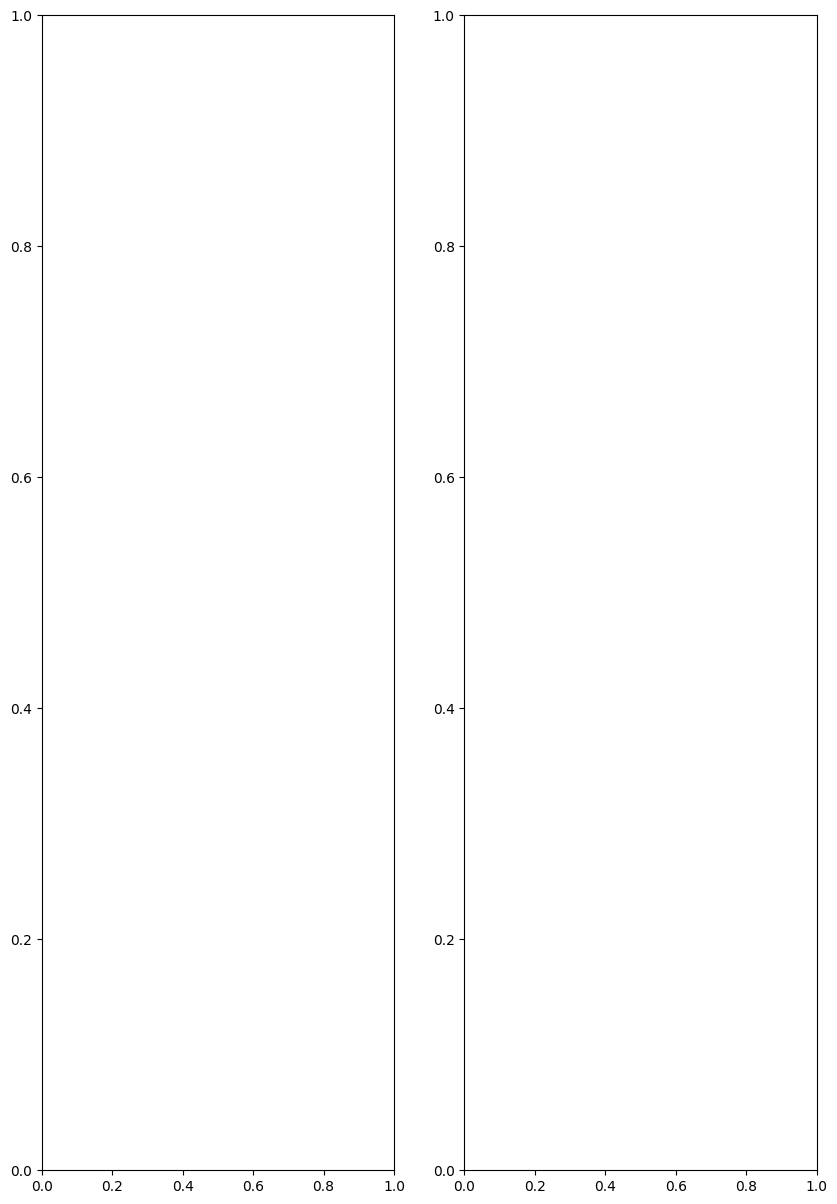

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))
for i in range(4):
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    for baboon in groups[i].keys():
        bc_noniterative = []
        bc_iterative = []
        for idx in np.intersect1d(predictions_noniterative.index, groups[i][baboon].metadata_I.index):
            score_iter = 0
            score_noniter = 0
            score_iter += braycurtis(true_data.loc[idx], predictions_iterative.loc[idx])/len(true_data)
            score_noniter += braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx])/len(true_data)


        bc_noniterative.append(score_noniter)
        bc_iterative.append(score_iter)
    sns.kdeplot(bc_noniterative, ax=axes[0, 0], label="noniterative", axes=axes[i, 0])
    sns.kdeplot(bc_iterative, ax=axes[0, 1], label="iterative", axes=axes[i, 0], label=f"fold {i}")

axes[0,0].set_title("non-iterative")
axes[0,1].set_title("iterative")
plt.show()

In [ ]:
model.fit()

In [ ]:
model.baboons[0].fit(np.array([1/3]*61))

In [5]:
metadata_df = pd.read_csv(metadata_path)
data_df = pd.read_csv(data_path)

metadata_df["collection_date"] = pd.to_datetime(metadata_df["collection_date"])

In [6]:
metadata_df.set_index('sample', inplace=True)
data_df.set_index('sample', inplace=True)

In [ ]:
model = social_model_class.superModel(data_path,   metadata_path)

In [10]:
metadata_df["collection_date_datetime"] = pd.to_datetime(metadata_df["collection_date"])

In [16]:
metadata_df.drop_duplicates(subset=["baboon_id", "collection_date"], inplace=True)

In [31]:
time_samples_df = metadata_df[["social_group", "collection_date_datetime"]].copy()

In [32]:
time_samples_df["delta_t_cnt"] = 0

In [ ]:
for group in time_samples_df["social_group"].unique():
    for t in time_samples_df["collection_date_datetime"][time_samples_df["social_group"] == group]:
        count = len(time_samples_df[(time_samples_df["social_group"]==group) & (abs(time_samples_df["collection_date_datetime"]-t).dt.days<=10)])
        time_samples_df["delta_t_cnt"][(time_samples_df["social_group"]==group) & (time_samples_df["collection_date_datetime"]==t)] = count
time_samples_df.drop_duplicates(inplace=True)

In [ ]:
for group in time_samples_df["social_group"].unique():
    plt.plot(sorted(time_samples_df["collection_date_datetime"][time_samples_df["social_group"]==group]), time_samples_df["delta_t_cnt"][time_samples_df["social_group"]==group], label=group)


In [ ]:
for t in time_samples_df.index:
    delta_t_datetimes = [i for i in range(t-7,t+7)]
    time_samples_df[""]

In [ ]:
time_samples_df.loc[pd.to_datetime('2000-05-19')]

In [ ]:
resampled_df